In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [287]:
import warnings
warnings.filterwarnings('ignore')

In [288]:
BHFP_data = pd.read_csv('Volve_BHFP_data.csv', index_col = 0)

In [289]:
BHFP_data.head()

,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE
DATEPRD,,,,
07/04/2014,15/9-F-1 C,0.0,0.000,0.000
08/04/2014,15/9-F-1 C,0.0,NaN,NaN
09/04/2014,15/9-F-1 C,0.0,NaN,NaN
10/04/2014,15/9-F-1 C,0.0,NaN,NaN
11/04/2014,15/9-F-1 C,0.0,310.376,96.876


In [290]:
BHFP_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15634 entries, 07/04/2014 to 18/09/2016
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   NPD_WELL_BORE_NAME        15634 non-null  object 
 1   ON_STREAM_HRS             15349 non-null  float64
 2   AVG_DOWNHOLE_PRESSURE     8980 non-null   float64
 3   AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64
dtypes: float64(3), object(1)
memory usage: 610.7+ KB


In [291]:
BHFP_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ON_STREAM_HRS,15349.0,19.994172,8.369911,0.0,24.0,24.0000,24.00000,25.000
AVG_DOWNHOLE_PRESSURE,8980.0,181.803870,109.712365,0.0,0.0,232.8970,255.40125,397.589
AVG_DOWNHOLE_TEMPERATURE,8980.0,77.162970,45.657949,0.0,0.0,103.1865,106.27700,108.502


### Findout if there is any null values

In [292]:
BHFP_data.isnull().sum()

NPD_WELL_BORE_NAME             0
ON_STREAM_HRS                285
AVG_DOWNHOLE_PRESSURE       6654
AVG_DOWNHOLE_TEMPERATURE    6654
dtype: int64

### Remove rows which contains all null elements

In [293]:
BHFP_data.dropna('how'=='all', inplace = True)

In [294]:
BHFP_data.isnull().sum()

NPD_WELL_BORE_NAME          0
ON_STREAM_HRS               0
AVG_DOWNHOLE_PRESSURE       0
AVG_DOWNHOLE_TEMPERATURE    0
dtype: int64

In [295]:
BHFP_data['AVG_DOWNHOLE_PRESSURE'][BHFP_data['AVG_DOWNHOLE_PRESSURE']==0]

DATEPRD
07/04/2014    0.0
21/04/2016    0.0
08/07/2013    0.0
09/07/2013    0.0
11/07/2013    0.0
             ... 
13/09/2016    0.0
14/09/2016    0.0
15/09/2016    0.0
16/09/2016    0.0
17/09/2016    0.0
Name: AVG_DOWNHOLE_PRESSURE, Length: 2312, dtype: float64

In [296]:
BHFP_data['AVG_DOWNHOLE_PRESSURE'] = BHFP_data['AVG_DOWNHOLE_PRESSURE'].replace(0, np.random.randint(220,255))

BHFP_data['AVG_DOWNHOLE_TEMPERATURE'] = BHFP_data['AVG_DOWNHOLE_TEMPERATURE'].replace(0, np.random.randint(100,106))

#  

Text(0.5, 1.0, 'Pressure vs Temperature plot')

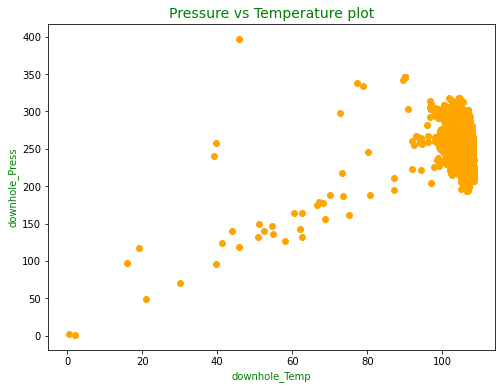

In [297]:
plt.figure(figsize = (8,6))

plt.scatter(BHFP_data['AVG_DOWNHOLE_TEMPERATURE'],BHFP_data['AVG_DOWNHOLE_PRESSURE'], color = 'orange')

plt.xlabel('downhole_Temp', color = 'green')
plt.ylabel('downhole_Press', color = 'green')
plt.title('Pressure vs Temperature plot', size = 14, color = 'green')


In [298]:
from sklearn.model_selection import train_test_split

In [299]:
X = BHFP_data[['AVG_DOWNHOLE_PRESSURE']]
y = BHFP_data[['AVG_DOWNHOLE_TEMPERATURE']]

In [300]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [301]:
from sklearn.linear_model import LinearRegression

In [302]:
model = LinearRegression()

In [303]:
model.fit(X_train,y_train)

LinearRegression()

In [304]:
yp_test = model.predict(X_test)

Text(0.5, 1.0, 'Pressure Measured vs Pressure Predicted')

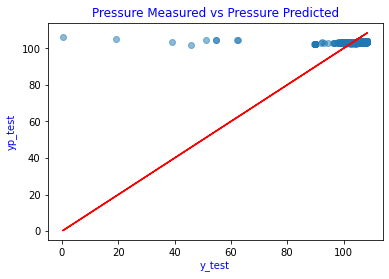

In [305]:

plt.scatter(y_test, yp_test, alpha = 0.5)
plt.plot(y_test,y_test, color = 'red')

plt.xlabel('y_test', color = 'blue')
plt.ylabel('yp_test', color = 'blue')
plt.title('Pressure Measured vs Pressure Predicted', color = 'blue')

In [306]:
from sklearn.metrics import mean_squared_error as mse

In [307]:
mse(yp_test,y_test)

21.512642928778984

Text(0, 0.5, 'Press')

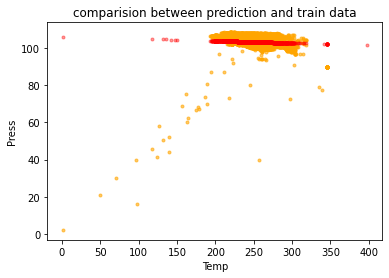

In [308]:
plt.title('comparision between prediction and train data')

plt.scatter(X_train,y_train, color = 'orange', alpha = 0.6, marker = '.')

plt.scatter(X_test,yp_test, color = 'r', alpha = 0.4,  marker = '.')

plt.xlabel('Temp')
plt.ylabel('Press')

Text(0, 0.5, 'BH Press')

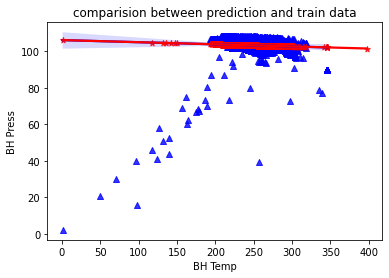

In [309]:
plt.title('comparision between prediction and train data')

sns.regplot(X_train,y_train, color = 'blue', marker = '^')

sns.regplot(X_test,yp_test, color = 'r',  marker = '*')

plt.xlabel('BH Temp')
plt.ylabel('BH Press')

In [310]:
X_train_2 = BHFP_data[['AVG_DOWNHOLE_PRESSURE']][:6500]
X_test_2 = BHFP_data[['AVG_DOWNHOLE_PRESSURE']][6500:]
y_train_2 = BHFP_data[['AVG_DOWNHOLE_TEMPERATURE']][:6500]
y_test_2 = BHFP_data[['AVG_DOWNHOLE_TEMPERATURE']][6500:]

In [319]:
model2 = LinearRegression()

In [320]:
model2.fit(X_train_2,y_train_2)

LinearRegression()

In [321]:
yp = model2.predict(X_test_2)

Text(0.5, 1.0, 'Pressure Measured vs Pressure Predicted using RandomForestRegressor')

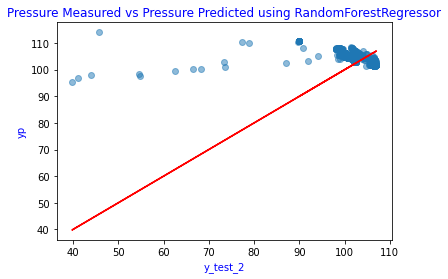

In [325]:
plt.scatter(y_test_2, yp, alpha = 0.5)
plt.plot(y_test_2,y_test_2, color = 'red')

plt.xlabel('y_test_2', color = 'blue')
plt.ylabel('yp', color = 'blue')
plt.title('Pressure Measured vs Pressure Predicted using RandomForestRegressor', color = 'blue')

Text(0, 0.5, 'BH Press')

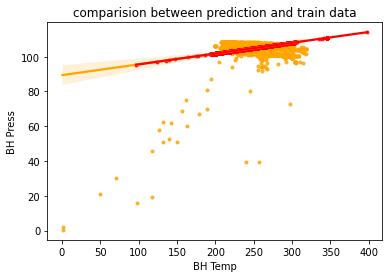

In [323]:
plt.title('comparision between prediction and train data')

sns.regplot(X_train_2,y_train_2, color = 'orange',  marker = '.')

sns.regplot(X_test_2,yp, color = 'r',  marker = '.')

plt.xlabel('BH Temp')
plt.ylabel('BH Press')